In [ ]:
import librosa
import pandas as pd
import numpy as np
import wave, os, glob
import statistics
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [ ]:
''' Code to extract features from Train dataset  '''


emo=["Sad","Happy","Angry","Neutral"]
path = r'C:\\Users\\dmtar\\Documents\\Train\\'

p=path

feature=[]
label=[]

encode={'Sad':0,'Happy':1,'Angry':2,'Neutral':3}

for j in emo:

    path=path+j
    
    for filename in glob.glob(os.path.join(path, '*.wav')):
        
        f=np.array([])
        data,sample_rate = librosa.load(filename)
        label.append(encode[j])
        MFCC=np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=47).T, axis=0)
        f=np.hstack((f, MFCC))
        
    
        MEL_SPECT=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
        f=np.hstack((f, MEL_SPECT))
        
        s=np.abs(librosa.stft(data))
        CHROMA=np.mean(librosa.feature.chroma_stft(S=s, sr=sample_rate).T,axis=0)
        f=np.hstack((f, CHROMA))
    
        
       
        feature.append(f)
        
    path=p    

print("Features Used: ")
print("MFCC")
print("Chroma")
print("Mel Spectrogram")

Features Used: 
MFCC
Chroma
Mel Spectrogram


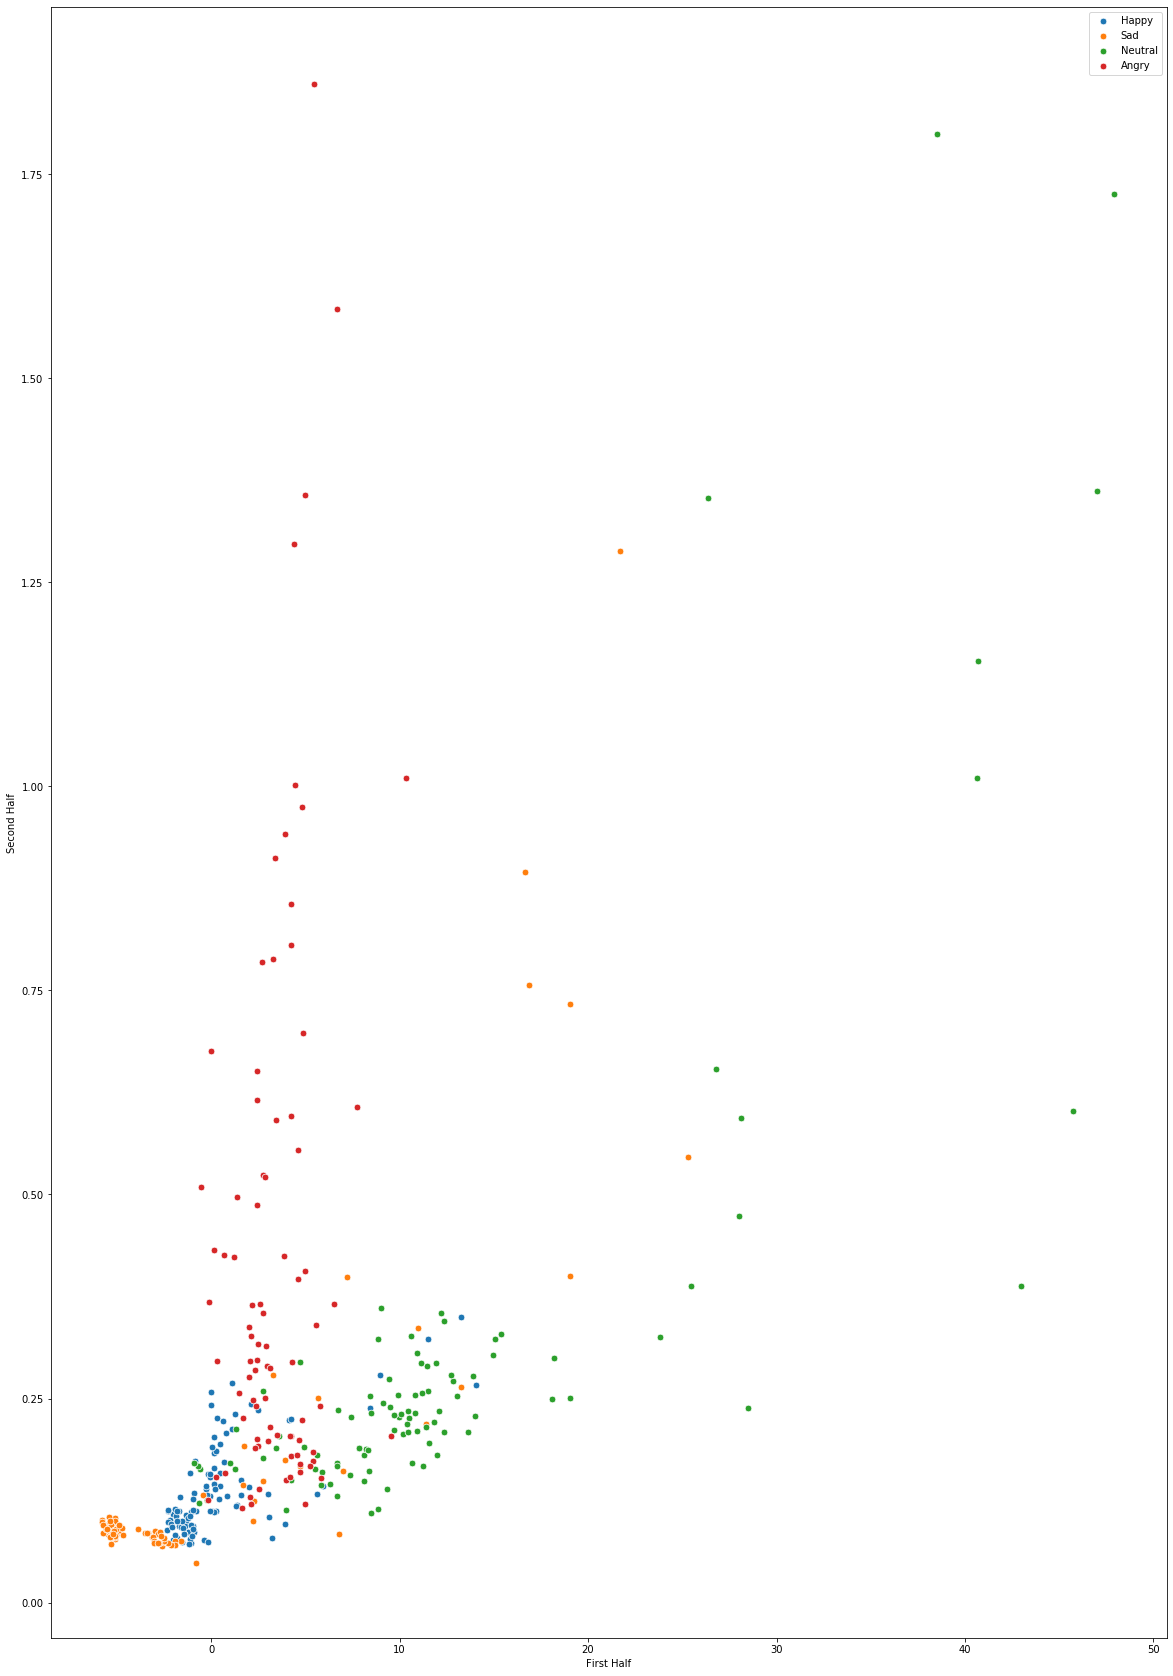

In [ ]:
''' Plotting the features extracted above  '''

plot1={'Happy':[],'Sad':[],'Neutral':[],'Angry':[]}

plot2={'Happy':[],'Sad':[],'Neutral':[],'Angry':[]}

decode={0:'Sad',1:'Happy',2:'Angry',3:'Neutral'}


  
for i in range(0,len(feature)):
    
    f_half=[]
    s_half=[]
    
    f=feature[i]
    
    for j in range(0,int(len(f)/2)):
        
        f_half.append(f[j])
        
    for j in range(int(len(f)/2),len(f)):
        
        s_half.append(f[j])
    
    
    plot1[decode[label[i]]].append(statistics.mean(f_half))
    plot2[decode[label[i]]].append(statistics.mean(s_half))
    
    

    
''' 
plt.figure(figsize=(20,10))

for i in plot1.keys():
    h1=plot1[i]  
    h2=plot2[i]    
    
    plt.scatter(h1,h2)

plt.xlabel('First Half')
plt.ylabel('Secound Half')
plt.legend(plot1.keys())
plt.show()
'''
plt.figure(figsize=(20,30))

for i in plot1.keys():
    
    h1=plot1[i] 
    h2=plot2[i]    
    
    
    df=pd.DataFrame(data=h1,columns=['First Half'])
    
    df['Second Half']=h2

    sns.scatterplot(data=df, x="First Half", y="Second Half",s=45)
    
plt.legend(plot1.keys())
plt.show()



In [ ]:

''' Traing the machine learning model  '''


model = KNeighborsClassifier(n_neighbors=3)

model.fit(feature, label)
#model_svc.fit(feature, label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:

''' Code to extract features from Test dataset  '''

path = r'C:\\Users\\dmtar\\Documents\\Test\\'

p=path

predict=[]
original_label=[]

for j in emo:

    path=path+j

    for filename in glob.glob(os.path.join(path, '*.wav')):
        
                
        f=np.array([])
        data,sample_rate = librosa.load(filename)
        original_label.append(encode[j])
        MFCC=np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=47).T, axis=0)
        f=np.hstack((f, MFCC))
        
    
        MEL_SPECT=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
        f=np.hstack((f, MEL_SPECT))
        
        s=np.abs(librosa.stft(data))
        CHROMA=np.mean(librosa.feature.chroma_stft(S=s, sr=sample_rate).T,axis=0)
        f=np.hstack((f, CHROMA))
    
        
       
        predict.append(f)
        
        
        
        
    path=p




In [ ]:
''' Predicting labels of test dataset and accuracy of model  '''

plabel=model.predict(predict)

print("Accuracy: ",accuracy_score(original_label, plabel)*100,"%")



Accuracy:  91.11111111111111 %


In [ ]:

''' Prediction of label of audio file SM25_F34_S084.wav  '''



file=r'C:\\Users\\dmtar\\Documents\\Test\\Sad\SM25_F34_S084.wav'

t=[]        

f=np.array([])
data,sample_rate = librosa.load(file)

MFCC=np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=47).T, axis=0)
f=np.hstack((f, MFCC))


MEL_SPECT=np.mean(librosa.feature.melspectrogram(data, sr=sample_rate).T,axis=0)
f=np.hstack((f, MEL_SPECT))

s=np.abs(librosa.stft(data))
CHROMA=np.mean(librosa.feature.chroma_stft(S=s, sr=sample_rate).T,axis=0)
f=np.hstack((f, CHROMA))

t.append(f)

print("Predicted Label For SM25_F34_S084.wav: ",decode[int(model.predict(t))])

Predicted Label For SM25_F34_S084.wav:  Sad
